In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [2]:
dataset=pd.read_csv("carpreprocess.csv")

In [3]:
data=dataset
y=data['decision']
X=data.drop(['decision'],axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=42)

In [5]:
X_test.head()

,Unnamed: 0,buy_price,maintain_cost,door,persons,luggage_boot,safety
599,599,3,3,4,2,3,1
932,932,2,4,4,4,3,1
628,628,3,3,6,2,3,3
1497,1497,1,3,6,4,2,2
1262,1262,2,1,4,6,2,1


In [6]:
y_test.head()

599     0
932     0
628     0
1497    1
1262    0
Name: decision, dtype: int64

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1381 entries, 107 to 1126
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     1381 non-null   int64
 1   buy_price      1381 non-null   int64
 2   maintain_cost  1381 non-null   int64
 3   door           1381 non-null   int64
 4   persons        1381 non-null   int64
 5   luggage_boot   1381 non-null   int64
 6   safety         1381 non-null   int64
dtypes: int64(7)
memory usage: 86.3 KB


In [8]:
y_train.head()

107     0
900     0
1708    0
705     0
678     0
Name: decision, dtype: int64

# Gaussian Naive Bayes Algorithm

In [9]:
nbcls=GaussianNB()
nbcls.fit(X_train, y_train)
ynbpred = nbcls.predict(X_test)

In [10]:
ynbpred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0,
       3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 3, 1, 2, 0, 0,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 3,
       0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       1, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 3, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 3, 0, 3, 0, 1, 0, 3, 3, 0, 3, 0, 1, 1,
       3, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 3, 0,
       0, 0, 0, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       3, 0, 0, 1, 3, 0, 3, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 3, 0,
       0, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3,
       0, 1, 3, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1,

In [11]:
accuracy=metrics.accuracy_score(y_test,ynbpred)
accuracy

0.7976878612716763

In [12]:
ynbpred=pd.DataFrame(data=ynbpred,columns=['predicted'])
ynbact=pd.DataFrame(data=y_test)
ynbact.index=range(0,346)
ynbtotal=pd.concat([ynbact,ynbpred],axis=1)
ynbtotal.head()

,decision,predicted
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0


In [13]:
confunb=confusion_matrix(ynbtotal['decision'],ynbtotal['predicted'])
confunb

array([[222,   5,   4,   6],
       [ 31,  31,   6,   9],
       [  1,   2,   6,   6],
       [  0,   0,   0,  17]], dtype=int64)

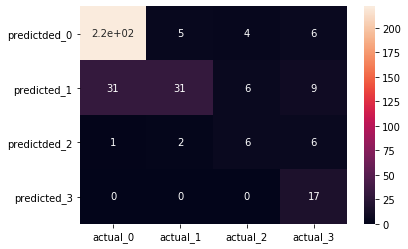

In [14]:
sns.heatmap(confunb,annot=True,xticklabels=['actual_0','actual_1','actual_2', 'actual_3'],yticklabels=['predictded_0','predicted_1','predictded_2','predicted_3'])
plt.show();

# Neural Network Classifier

## Finding the hyper-parameter

In [22]:
neuaccu=[]
layers=[50,100,500,1000,10000]
for i in tqdm(layers):
    neural=MLPClassifier(hidden_layer_sizes=(100,i))
    neupred=neural.fit(X_train,y_train).predict(X_test)
    d=metrics.accuracy_score(y_test,neupred)
    neuaccu.append(d)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [01:32<00:00, 18.52s/it]


In [23]:
maxaccu=max(neuaccu)
print(neuaccu)
maxaccu

[0.6329479768786127, 0.6907514450867052, 0.33815028901734107, 0.684971098265896, 0.684971098265896]


0.6907514450867052

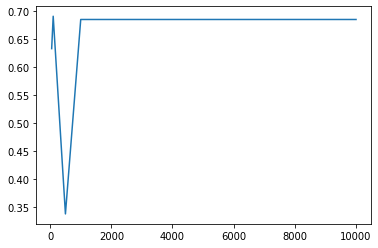

In [25]:
plt.plot(layers,neuaccu)
xlabel=('layers')
ylabel=('accuracies')
plt.show();

In [27]:
neuralfinal=MLPClassifier(hidden_layer_sizes=(100,1000))
neufinalpred=neural.fit(X_train,y_train).predict(X_test)

In [28]:
yneupred=pd.DataFrame(data=neufinalpred,columns=['predicted'])
yneuact=pd.DataFrame(data=y_test)
yneuact.index=range(0,346)
yneutotal=pd.concat([yneuact,yneupred],axis=1)
yneutotal.head()

,decision,predicted
0,0,2
1,0,2
2,0,2
3,1,2
4,0,2


In [30]:
confneu=confusion_matrix(yneutotal['decision'],yneutotal['predicted'])
confneu

array([[101,   0, 136,   0],
       [ 13,   0,  64,   0],
       [  0,   0,  15,   0],
       [  0,   0,  17,   0]], dtype=int64)

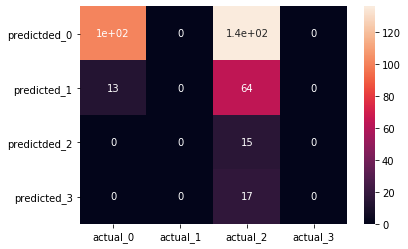

In [31]:
sns.heatmap(confneu,annot=True,xticklabels=['actual_0','actual_1','actual_2', 'actual_3'],yticklabels=['predictded_0','predicted_1','predictded_2','predicted_3'])
plt.show();